In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

# Verificar se a GPU está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

torch.set_default_dtype(torch.float64)


Usando o dispositivo: cpu


Resultados:
O PyTorch levou 7.335s para treinar o modelo usando a cpu.
Tipo dos tensores usados:
X: torch.float64
y: torch.float64
y_pred: torch.float64

Gráfico dos resultados:


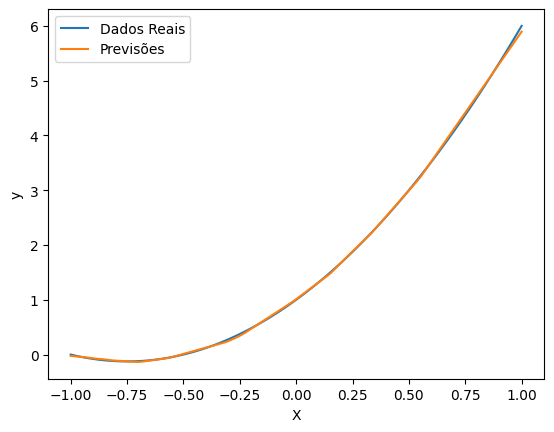

In [ ]:
# Para contar o tempo de execução
import time

start_time = time.time()


# Geração de dados
def f(X):
    return 2 * X**2 + 3 * X + 1


X = torch.linspace(-1, 1, 100).unsqueeze(1).to(device)
y = f(X)


# Construção do modelo
model = nn.Sequential(
    nn.Linear(1, 20),
    nn.ReLU(),  #
    nn.Linear(20, 20),
    nn.ReLU(),  #
    nn.Linear(20, 1),
).to(device)

# Definir otimizador e função de perda
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# Treinamento do modelo
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

# Avaliação do modelo no conjunto de teste
model.eval()
with torch.no_grad():
    y_pred = model(X)

# Mover dados para CPU de volta
X_cpu = X.cpu()
y_cpu = y.cpu()
y_pred_cpu = y_pred.cpu()

execution_time = time.time() - start_time

# Imprimindo resultados do Benchmark
print("Resultados:")
print(f"O PyTorch levou {execution_time:.3f}s para treinar o modelo usando a {device}.")
print("Tipo dos tensores usados:")
print("X:", X.dtype)
print("y:", y.dtype)
print("y_pred:", y_pred.dtype)
print()

# Plotar os resultados
print("Gráfico dos resultados:")
plt.plot(X_cpu, y_cpu, label="Dados Reais")
plt.plot(X_cpu, y_pred_cpu.numpy(), label="Previsões")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
